<a href="https://colab.research.google.com/github/DioGitH/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Maulidio Farhan Rizkullah
## 2141720041
## 19
## 3F

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
import matplotlib.pyplot as plt

In [11]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalface_alt.xml')

def facedet(image):
  original = image
  facedetect = original.copy()
  roi_wajah = cascade_wajah.detectMultiScale(facedetect)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(facedetect, (x,y), (x+w, y+h), (255,255,255),3)
  plt.figure(figsize = (10,10))
  plt.subplot(121, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.subplot(122, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(facedetect, cv.COLOR_BGR2RGB))



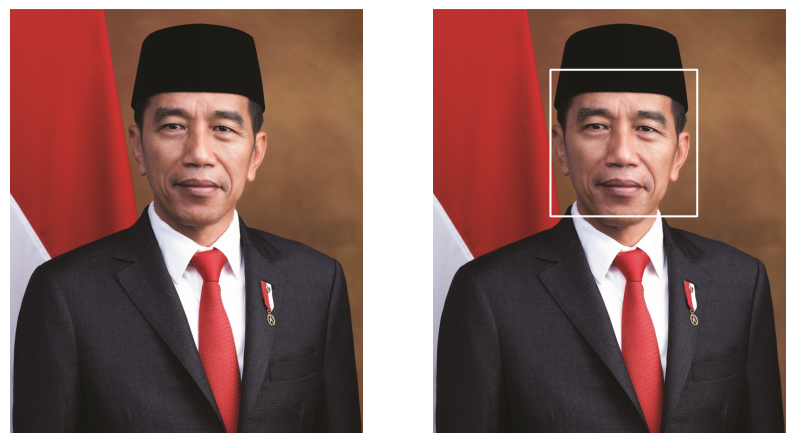

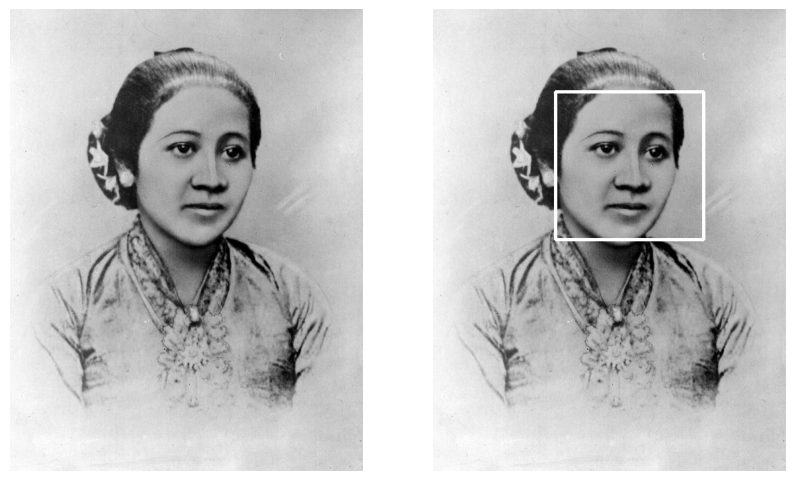

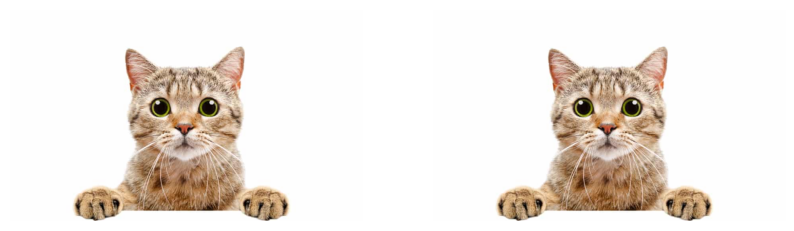

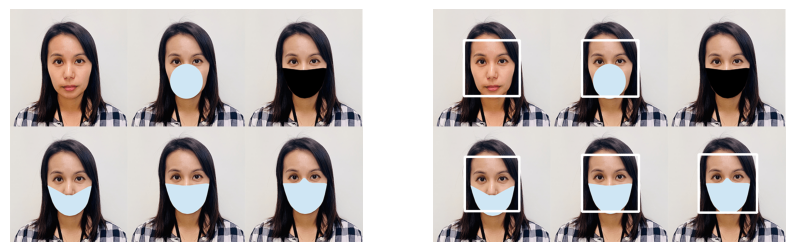

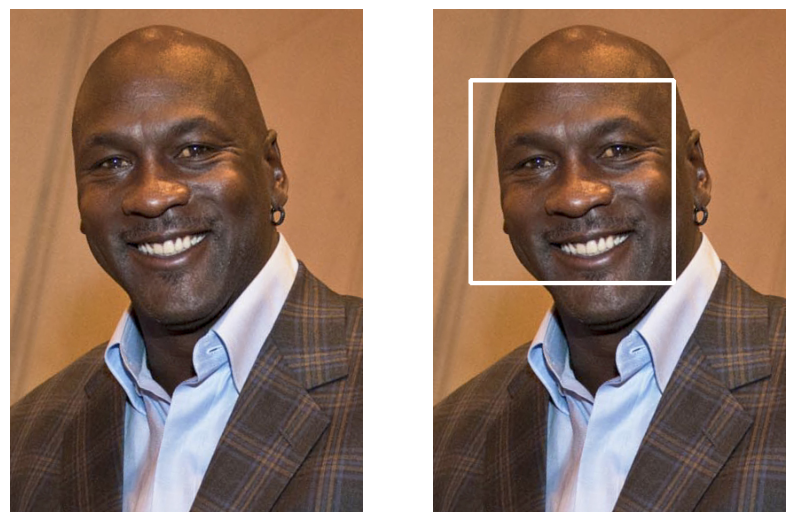

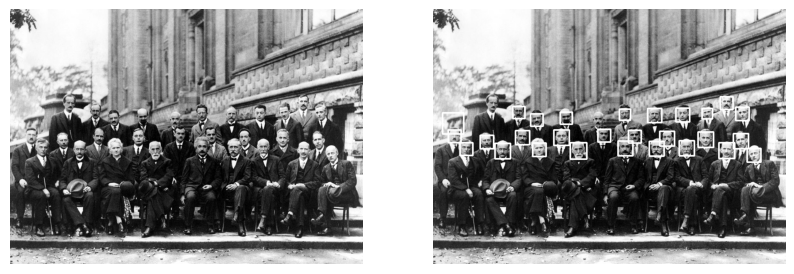

In [15]:
jokowi = cv.imread('/content/drive/MyDrive/Images/facedet/jokowi.jpg')
kartini = cv.imread('/content/drive/MyDrive/Images/facedet/kartini.jpg')
kucing = cv.imread('/content/drive/MyDrive/Images/facedet/kucing.jpg')
perempuan = cv.imread('/content/drive/MyDrive/Images/facedet/mask.png')
mjordan = cv.imread('/content/drive/MyDrive/Images/facedet/mjordan.jpg')
solvayconf = cv.imread('/content/drive/MyDrive/Images/facedet/solvayconf.jpg')

dataset = [jokowi, kartini, kucing, perempuan, mjordan, solvayconf]

for i, ax in enumerate (dataset):
  facedet(dataset[i])

### Mendeteksi wajah kucing

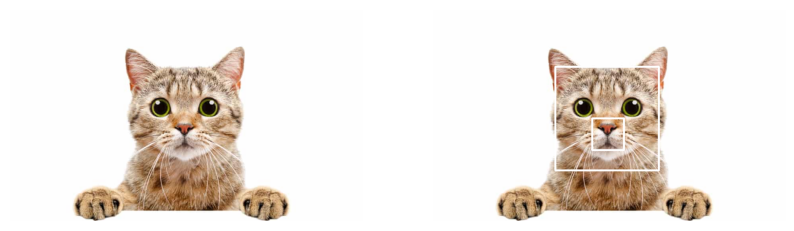

In [16]:
cascade_cat = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_frontalcatface.xml')

def facecatdet(image):
  original = image
  facedetect = original.copy()
  roi_wajah = cascade_cat.detectMultiScale(facedetect)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(facedetect, (x,y), (x+w, y+h), (255,255,255),3)
  plt.figure(figsize = (10,10))
  plt.subplot(121, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.subplot(122, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(facedetect, cv.COLOR_BGR2RGB))

facecatdet(kucing)


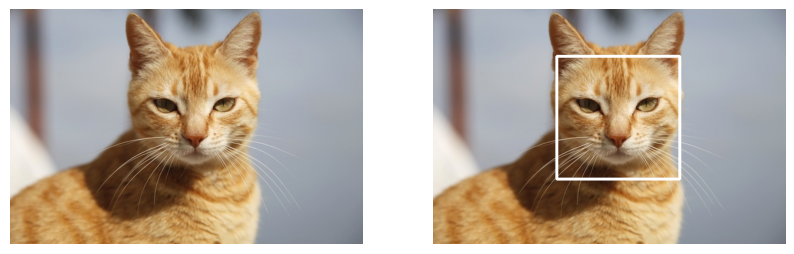

In [17]:
kucing2 = cv.imread('/content/drive/MyDrive/Images/facedet/mycat.jpg')
facecatdet(kucing2)

### 4. Eyes detection

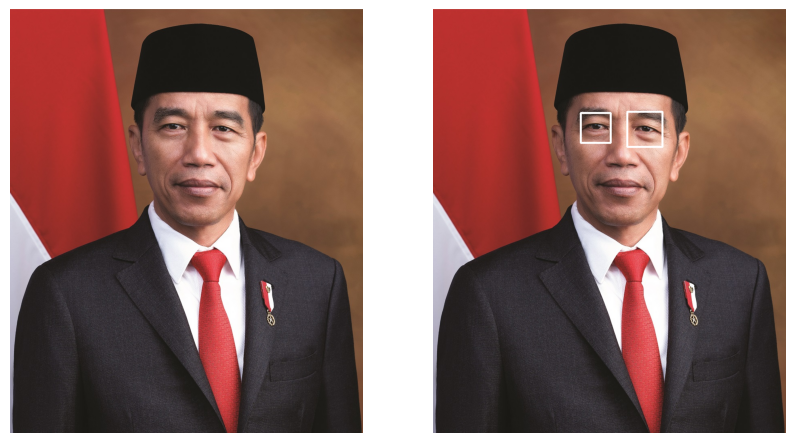

In [18]:
cascade_eyes = cv.CascadeClassifier('/content/drive/MyDrive/Images/haarcascades/haarcascade_eye.xml')

def eyesdet(image):
  original = image
  eyesdetect = original.copy()
  roi_wajah = cascade_eyes.detectMultiScale(eyesdetect)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(eyesdetect, (x,y), (x+w, y+h), (255,255,255),3)
  plt.figure(figsize = (10,10))
  plt.subplot(121, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.subplot(122, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(eyesdetect, cv.COLOR_BGR2RGB))

eyesdet(jokowi)

### 5. Melakukan Face Tracking

In [19]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [20]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [21]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [22]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


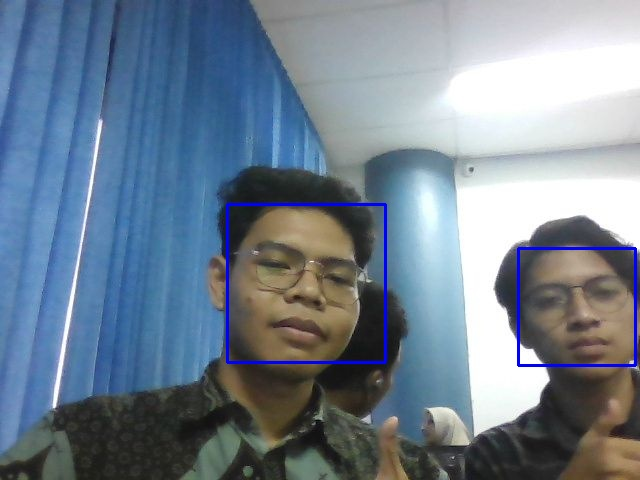

In [27]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [24]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [26]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

### 6. Melakukan blurring pada bagian wajah

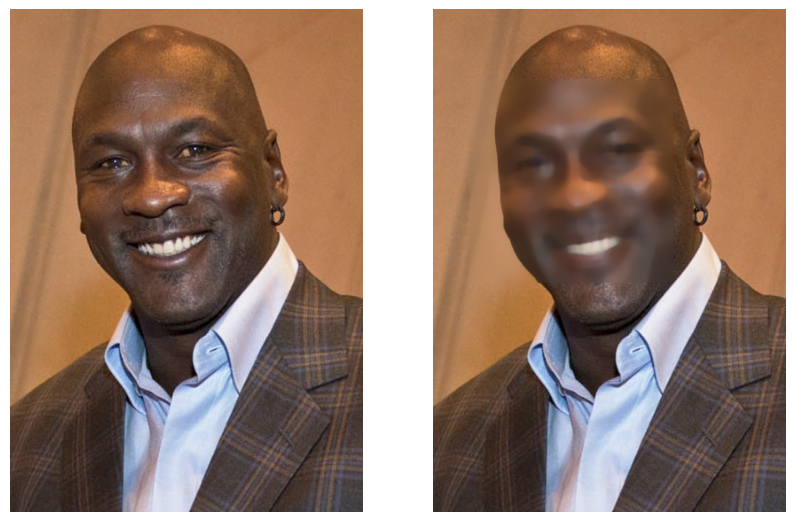

In [35]:
def blurdet(image):
  original = image
  facedetect = original.copy()
  roi_wajah = cascade_wajah.detectMultiScale(facedetect)
  for(x,y,w,h) in roi_wajah:

     # get the region of the face
    face_roi = facedetect[y:y + h, x:x + w]

    # apply blurring to the part of the face
    blurred = cv2.medianBlur(face_roi, 15)
    # replace the part of the face with the blurred image
    facedetect[y:y+h, x:x+w] = blurred
  plt.figure(figsize = (10,10))
  plt.subplot(121, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
  plt.subplot(122, frameon=False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(cv.cvtColor(facedetect, cv.COLOR_BGR2RGB))

blurdet(mjordan)

##### Kelompok 5 :
1. Amalia Salsa Lutfiana (04)
2. Maulidio Farhan Rizkullah (19)
3. Raden Rizki (25)
4. Roziq Mahbubi (27)
5. Yofandra Arta Priyoga (30)

### 7. Melakukan segmentasi karakter pada KTP

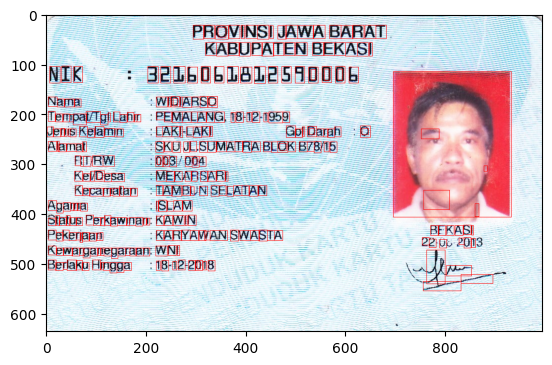

In [42]:
from skimage import morphology
from google.colab.patches import cv2_imshow

ktp = cv2.imread('/content/drive/MyDrive/Images/ktp/ktp6.png')

blurred = cv2.GaussianBlur(ktp, (21,21), 0.5)
sharpened2 = cv2.addWeighted(ktp, 1.5, blurred,-0.5,0)
gray2 = cv2.cvtColor(sharpened2, cv2.COLOR_BGR2GRAY)

ret2, bw2 = cv2.threshold(gray2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# print(ret, bw.shape)

kernel = np.ones((2,2),np.uint8)

morphology = cv2.morphologyEx(bw2, cv2.MORPH_CLOSE, kernel)

contours2, _ = cv2.findContours(morphology, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for contour in contours2:
  x, y, w, h = cv2.boundingRect(contour)
  if(w>3 and h>10):
    result2 = cv2.rectangle(ktp, (x, y), (x+w, y+h),(0,0,255),1)

plt.imshow(cv.cvtColor(result2, cv.COLOR_BGR2RGB))

### 8. Melakukan cropping

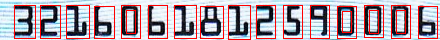

In [45]:
crop_image = result2[100:140, 190:630]

cv2_imshow(crop_image)

### 9. Melakukan pengenalan karakter menggunakan Deep Learning

In [4]:
import os
import tqdm
import cv2
import random
import numpy as np
import pickle

# Direktori data training
DATADIR = "/content/drive/MyDrive/Images/dataset/"
dirs = []

training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
    dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
    path = os.path.join(DATADIR, char_name)
    class_number = dirs.index(char_name)
    for img in tqdm.tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # Ubah menjadi grayscale
            new_array = cv2.resize(img_array, (width, height))
            training_data.append([new_array, class_number])
        except Exception as e:
            print(f"Error processing image: {e}")

random.shuffle(training_data)
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, width, height, 1)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()


100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


### 10. Melakukan training dataa

In [9]:
import pickle
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np

# Load file pickle
with open("X.pickle", "rb") as pickle_in:
    X = pickle.load(pickle_in)

with open("Y.pickle", "rb") as pickle_in:
    Y = pickle.load(pickle_in)

# One-hot encode the labels
Y = to_categorical(Y, num_classes=34)

# Normalize pixel values to be between 0 and 1
X = np.array(X) / 255.0

width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 1))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

flaten = Flatten()(conv_layer)

fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(34, activation='softmax')(fc_layer)

adam = Adam(lr=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X, Y, epochs=20, verbose=1)

# Save the trained model
model.save('/content/drive/MyDrive/Images/dataset/anpr_model.h5')


Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 3.5187 - accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 295ms/step - loss: 3.1502 - accuracy: 0.1000
Epoch 3/20
1/1 [==============================] - 0s 319ms/step - loss: 2.7847 - accuracy: 0.1000
Epoch 4/20
1/1 [==============================] - 0s 285ms/step - loss: 2.5368 - accuracy: 0.3000
Epoch 5/20
1/1 [==============================] - 0s 299ms/step - loss: 2.2319 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 290ms/step - loss: 1.8720 - accuracy: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 307ms/step - loss: 1.4455 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 271ms/step - loss: 0.9642 - accuracy: 0.8000
Epoch 9/20
1/1 [==============================] - 0s 362ms/step - loss: 0.4743 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 399ms/step - loss: 0.1588 - accuracy: 1.0000
Epoch 11/20
1/1 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 11. Testing data

In [11]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/Images/train-test/training/"
data_dir_testing = "/content/drive/MyDrive/Images/train-test/testing/"
dirs = []
width, height = 100, 100

model = tf.keras.models.load_model("/content/drive/MyDrive/Images/dataset/anpr_model.h5")

for char_name in sorted(os.listdir(data_dir_training)):
  dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
  temp = ""
  for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
    img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_ANYCOLOR)
    new_array = cv2.resize(img_array, (width, height))
    new_array = np.array(new_array).reshape(-1, width, height,1)

    new_array = new_array / 255.0

    prediction = model.predict(new_array)
    temp += dirs[np.argmax(prediction[0])]

  print("folder name: {} no: {}".format(car, temp))

1/1 [==============================] - 0s 165ms/step
folder name: 0 - Copy (2) no: 4
1/1 [==============================] - 0s 44ms/step
folder name: 2 no: 4
1/1 [==============================] - 0s 39ms/step
folder name: 2 - Copy no: 4
1/1 [==============================] - 0s 36ms/step
folder name: 2 - Copy - Copy no: 4
1/1 [==============================] - 0s 61ms/step
folder name: 3 - Copy (4) no: 4
1/1 [==============================] - 0s 55ms/step
folder name: 4 - Copy (3) no: 4
1/1 [==============================] - 0s 61ms/step
folder name: 6 - Copy (2) no: 3 - Copy
1/1 [==============================] - 0s 54ms/step
folder name: 7 - Copy no: 4
1/1 [==============================] - 0s 58ms/step
folder name: 8 - Copy no: 1
